<a href="https://colab.research.google.com/github/lacakp/Project-Mask-Detection/blob/main/Project_Mask_Detection_Train_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Project Mask Detection training model use machine learning

https://medium.com/analytics-vidhya/what-is-a-pipeline-in-machine-learning-how-to-create-one-bda91d0ceaca

dataset - https://www.kaggle.com/omkargurav/face-mask-dataset

In [15]:
# https://medium.com/super-ai-engineer/kora-%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B8%A1%E0%B8%B7%E0%B8%AD%E0%B8%94%E0%B8%B5-%E0%B9%86-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%84%E0%B8%99%E0%B8%A3%E0%B8%B1%E0%B8%81-google-colab-137c193641c0
!pip install -q kora # https://github.com/korakot/kora

In [13]:
from kora import kaggle
kaggle.search('omkargurav/face-mask-dataset')
# https://www.kaggle.com/omkargurav/face-mask-dataset

,ref,title,size,lastUpdated,downloadCount
0,omkargurav/face-mask-dataset,Face Mask Detection Dataset,163MB,2020-07-31 18:34:42,5049


In [14]:
kaggle.download('omkargurav/face-mask-dataset')

 96% 156M/163M [00:01<00:00, 123MB/s]
100% 163M/163M [00:01<00:00, 129MB/s]


In [5]:
import tensorflow as tf
import numpy as np 

# Face mask detection using computer vision

## Get data - load dataset

- หน้าที่มีหน้ากาก กับหน้าที่ไม่มีหน้ากาก
- ใช้ภาพทดสอบจาก image_dataset_from_ditectory() ของ keras.preprocssing

In [17]:
!pwd

/content


In [28]:
width, height = 224, 224
# mobileNetv2 network
batch_size = 32
data_dir = r"/content/data"

In [29]:
training = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'training',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 7553 files belonging to 2 classes.
Using 5288 files for training.


In [31]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'training',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 7553 files belonging to 2 classes.
Using 5288 files for training.


In [32]:
classes = training.class_names
print(classes)
print(training)

['with_mask', 'without_mask']
<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


## เช็คดูภาพใน ชุดข้อมูล

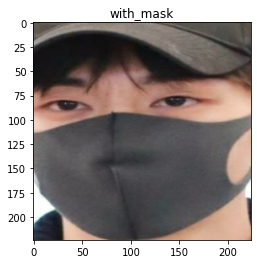

In [35]:
import matplotlib.pyplot as plt
for images, labels in training.take(1):
  plt.imshow(images[3].numpy().astype('uint8'))
  plt.title(classes[labels[3]])

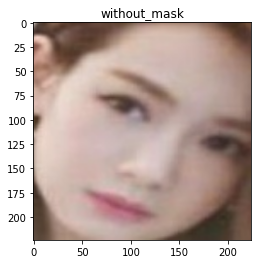

In [46]:
for images, labels in training.take(1):
  plt.imshow(images[3].numpy().astype('uint8'))
  plt.title(classes[labels[3]])

## MobileNetv2 model

In [39]:
from tensorflow.keras.applications import MobileNetV2

In [41]:
model = MobileNetV2(weights = 'imagenet')

14548992/14536120 [==============================] - 0s 0us/step


## รันโมเดล

In [47]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [48]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

# Training the model

https://keras.rstudio.com/reference/fit.html#arguments

validation_data	
Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. This could be a list (x_val, y_val) or a list (x_val, y_val, val_sample_weights). validation_data will override validation_split.


- หมายถึง ข้อมูลการตรวจสอบ ประเมินค่า loss และ model metrics เมื่อจบ epoch


epochs
Number of epochs to train the model. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.

- epochs	คือ จำนวนครั้งในการฝึกโมเดล

In [ ]:
# train 3 ครั้ง
# face_mask_detection = model.fit(training, validation_data= validation, epochs=3)

In [ ]:
# train 1 ครั้ง
face_mask_detection = model.fit(training, validation_data= validation, epochs=1)

In [49]:
face_mask_detection = model.fit(training, validation_data= validation, epochs=3)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


166/166 [==============================] - 1161s 7s/step - loss: 0.1547 - accuracy: 0.9703 - val_loss: 4.2973 - val_accuracy: 0.8050
Epoch 2/3
166/166 [==============================] - 1147s 7s/step - loss: 0.0549 - accuracy: 0.9837 - val_loss: 0.6734 - val_accuracy: 0.9276
Epoch 3/3
166/166 [==============================] - 1150s 7s/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 1.1814 - val_accuracy: 0.8561


- ETA คือเวลาที่คาดว่า กำลังจะเสร็จ
- loss คือ ค่าความสูญเสีย (ผิดพลาด) 
- accuracy คือค่าความถูกต้อง

# Predicting

In [51]:
from google.colab import files

uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Saving testimg.jpg to testimg.jpg


In [56]:

# โหลดภาพมา
# image = tf.keras.preprocessing.image.load_img(image_path)
img = tf.keras.preprocessing.image.load_img('testimg.jpg', target_size=(height, width))

# แปลงเป็น array
image_array = tf.keras.preprocessing.image.img_to_array(img)
# ขยายมิติภาพเพื่อให้ fit กับ model
image_array = tf.expand_dims(image_array, 0)

# เช็ค shape ภาพ
image_array.shape

TensorShape([1, 224, 224, 3])

In [66]:
import random 
predictions = model.predict(image_array)
score = tf.nn.softmax(predictions[0])

for i in range(15):
  ran = random.randint(1, len(score))
  res= score[ran]*100000
  print(res)
print(type(res))


tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
tf.Tensor(99.828476, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


*Save the model*

In [67]:
model.save('mask_detection_model', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
